# Data exploration

In [3]:
import pandas as pd
import numpy as np

from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression
from scipy.special import logit

import seaborn as sns
import matplotlib.pyplot as plt
# from netCDF4 import Dataset
import xarray as xr


# Load the GEBCO netCDF data grid

I will use the xarray package for handling the netCDF


In [4]:
#  downloaded from https://download.gebco.net/
file_path = "../data/gebco_2023_n51.5918_s45.022_w-68.4229_e-57.6123.nc"
dataset = xr.open_dataset(file_path)
dataset

<xarray.Dataset> Size: 8MB
Dimensions:    (lat: 1577, lon: 2594)
Coordinates:
  * lat        (lat) float64 13kB 45.02 45.03 45.03 45.04 ... 51.58 51.59 51.59
  * lon        (lon) float64 21kB -68.42 -68.41 -68.41 ... -57.62 -57.62 -57.61
Data variables:
    elevation  (lat, lon) int16 8MB ...
Attributes: (12/36)
    title:                           The GEBCO_2023 Grid - a continuous terra...
    summary:                         The GEBCO_2023 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    references:                      DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    node_offset:                     1.0

Let's look at details about the elevation variable, which is the main variable of interest for us.


In [28]:
dataset.elevation

<xarray.DataArray 'elevation' (lat: 1577, lon: 2594)> Size: 8MB
[4090738 values with dtype=int16]
Coordinates:
  * lat      (lat) float64 13kB 45.02 45.03 45.03 45.04 ... 51.58 51.59 51.59
  * lon      (lon) float64 21kB -68.42 -68.41 -68.41 ... -57.62 -57.62 -57.61
Attributes:
    standard_name:       height_above_mean_sea_level
    long_name:           Elevation relative to sea level
    units:               m
    grid_mapping:        crs
    sdn_parameter_urn:   SDN:P01::ALATZZ01
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres

We can see the associated units for this variable is meters

Each elevation variable is associated with a lat / lon coordinate.

For example, if I have the coordinates: 47.87, -60.24, here is how we get the elevation:

In [29]:
lat = 47.87
lon = -60.24
# use the "nearest" method to determine how to deal with the miss elevation value for this coordinate pair 
subset = dataset.sel(lat=lat, lon=lon, method="nearest")
print(f"""The elevation at ({lat},{lon}) is {subset.elevation.values}{subset.elevation.units}.""")

The elevation at (47.87,-60.24) is -492m.


That looks good. 

### presenting the elevation 2D array as a map 

`xarray` package makes this super easy.


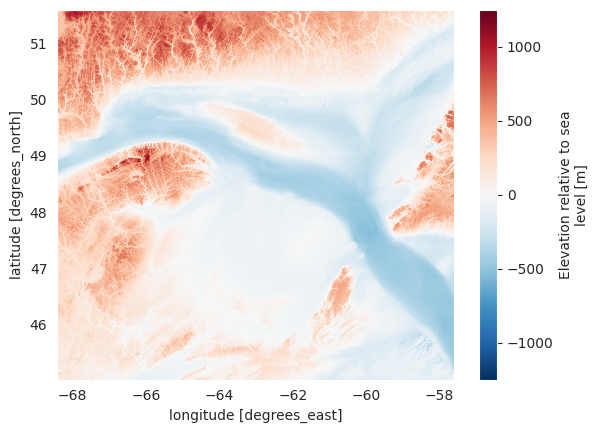

In [19]:

fig, ax = plt.subplots(ncols=1)

elevation = dataset.elevation
elevation.plot(ax=ax)


### Nice!!!

# Get hold of the main dataset

https://open.canada.ca/data/en/dataset/1989de32-bc5d-c696-879c-54d422438e64
https://open.canada.ca/data/en/dataset/1989de32-bc5d-c696-879c-54d422438e64/resource/6548c805-4b6f-4439-8e5b-6dd293684794


In [21]:
# load the data into a pandas dataframe
df = pd.read_csv("../data/sGSL-September-RV-FGP.csv")


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166694 entries, 0 to 166693
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   year__annee                      166694 non-null  int64  
 1   month__mois                      166694 non-null  int64  
 2   day__jour                        166694 non-null  int64  
 3   start_hour__heure_de_depart      166694 non-null  int64  
 4   start_minute__minute_de_depart   166694 non-null  int64  
 5   latitude                         166694 non-null  float64
 6   longitude                        166694 non-null  float64
 7   gear__equipement                 166694 non-null  object 
 8   species__espece                  166694 non-null  int64  
 9   french_name__nom_francais        165805 non-null  object 
 10  english_name__nom_anglais        166664 non-null  object 
 11  latin_name__nom_latin            159864 non-null  object 
 12  we

The data looks very clean. All the fields are non-null and the data types look promising.

In [23]:
df.head()

,year__annee,month__mois,day__jour,start_hour__heure_de_depart,start_minute__minute_de_depart,latitude,longitude,gear__equipement,species__espece,french_name__nom_francais,english_name__nom_anglais,latin_name__nom_latin,weight_caught__poids_pris,number_caught__quantite_attrape
0,1971,9,7,8,25,48.016667,-64.766667,Yankee #36 otter trawl,10,Morue franche,Atlantic cod,Gadus morhua,335.669374,261.985853
1,1971,9,7,8,25,48.016667,-64.766667,Yankee #36 otter trawl,40,Plie canadienne,American plaice,Hippoglossoides platessoides,158.100000,1035.400000
2,1971,9,7,8,25,48.016667,-64.766667,Yankee #36 otter trawl,41,Plie grise,Witch flounder,Glyptocephalus cynoglossus,1.250000,2.500000
3,1971,9,7,8,25,48.016667,-64.766667,Yankee #36 otter trawl,60,Hareng atlantique,Atlantic herring,Clupea harengus,0.000000,0.822368
4,1971,9,7,8,25,48.016667,-64.766667,Yankee #36 otter trawl,64,Capelan,Capelin,Mallotus villosus,0.000000,231.989202


In [26]:
df.describe()

,year__annee,month__mois,day__jour,start_hour__heure_de_depart,start_minute__minute_de_depart,latitude,longitude,species__espece,weight_caught__poids_pris,number_caught__quantite_attrape
count,166694.000000,166694.000000,166694.000000,166694.000000,166694.000000,166694.000000,166694.000000,166694.000000,166694.000000,166694.000000
mean,2004.735551,8.994835,16.862976,11.549090,29.460245,47.428990,-62.767278,3005.727201,11.842372,63.417712
std,11.122060,0.141902,6.970248,6.932314,17.305093,0.769587,1.269305,3038.585747,194.071994,1344.227220
min,1971.000000,8.000000,1.000000,0.000000,0.000000,45.693083,-65.914667,10.000000,0.000000,0.000000
25%,1997.000000,9.000000,11.000000,6.000000,15.000000,46.899583,-63.760583,300.000000,0.023596,0.000000
50%,2006.000000,9.000000,17.000000,11.000000,30.000000,47.445333,-62.800000,2316.000000,0.238636,0.597400
75%,2014.000000,9.000000,23.000000,18.000000,45.000000,48.016667,-61.780833,6113.000000,1.998513,4.861111
max,2022.000000,10.000000,31.000000,23.000000,59.000000,49.146417,-60.099500,9999.000000,39288.666500,369467.942165


From the above, we can glean a few details:

- The dataset ranges from year 1971 to 2022
- There are 166694 observations
- In general these data were collected in September: mean month=8.99 std=0.14

### Now let's drill a bit deeper into the data

## Species


### How many different species have been observed?


In [32]:
counts = df["english_name__nom_anglais"].value_counts()
print(counts.shape)

(533,)


There were 533 different species reported in this dataset

### Which were the most common by weight? 


In [49]:
df.loc[:, ["english_name__nom_anglais", "weight_caught__poids_pris"]].groupby("english_name__nom_anglais").sum().sort_values("weight_caught__poids_pris",
                                                                                                                             ascending=False)[:10]

,weight_caught__poids_pris
english_name__nom_anglais,
Atlantic cod,449199.443643
Atlantic herring,361825.373936
American plaice,184805.113381
Redfish unidentified,151411.641558
Boreal red shrimp unidentified,136369.898373
Queen crab unidentified,97292.607438
American lobster,76858.380857
Winter flounder,65924.883460
Snow crab,35979.203155


### how about the most common by abundance? 

In [50]:
df.loc[:, ["english_name__nom_anglais", "number_caught__quantite_attrape"]].groupby("english_name__nom_anglais").sum().sort_values(
    "number_caught__quantite_attrape", ascending=False)[:10]

,number_caught__quantite_attrape
english_name__nom_anglais,
Atlantic herring,2.817182e+06
Capelin,2.305644e+06
American plaice,1.205424e+06
Rainbow smelt,1.028485e+06
Atlantic cod,6.449475e+05
Redfish unidentified,6.262165e+05
Winter flounder,3.637473e+05
Snow crab,2.493523e+05
American lobster,1.770155e+05


# Sites / Samples

When looking at the dataset, we can see that there are many rows that correspond to a date-time-coordinate combination

I will refer to this combination from hereon out as a fishing set, or _set_ for short

Let's create a new dataframe the contains a unique list of sets


In [70]:

# create a helper function to create a unique string for each set 
def get_set_string(row):
    year = f"{row['year__annee']}"
    month = f"{str(row['month__mois']).rjust(2, '0')}"
    day = f"{str(row['day__jour']).rjust(2, '0')}"
    hour = f"{row['start_hour__heure_de_depart']}"
    minute = f"{row['start_minute__minute_de_depart']}"
    lat = f"{row['latitude']}"
    lon = f"{row['longitude']}"
    return "-".join([year, month, day, hour, minute, lat, lon])


# add a new col called "set" to the DF
df["set_string"] = df.apply(get_set_string, axis=1)
# sort the DF by this new column so that the rows will be in descending chronological order
df.sort_values("set_string", inplace=True)

df.head()["set_string"]

11    1971-09-07-11-15-47.9666666666667--65.11666666...
16    1971-09-07-11-15-47.9666666666667--65.11666666...
15    1971-09-07-11-15-47.9666666666667--65.11666666...
14    1971-09-07-11-15-47.9666666666667--65.11666666...
13    1971-09-07-11-15-47.9666666666667--65.11666666...
Name: set_string, dtype: object

In [72]:


sets = df["set_string"].unique()
sets.shape


(7257,)

OK so we go from 167K observations to only 7257 sets

The set strings are ugly let's give it a prettier identifier...

In [74]:

set_string_2_id_map = dict()
i = 1
for s in sets:
    set_string_2_id_map[s] = i
    i += 1



In [77]:
df["set_id"] = df["set_string"].map(set_string_2_id_map)
df.drop(columns=["set_string"], inplace=True)

KeyError: 'set_string'

In [78]:
df.head()["set_id"]

11    1
16    1
15    1
14    1
13    1
Name: set_id, dtype: int64

### Wonderful. Now let's divide the datasets into two tables: `species_df` and `set_df`

In [83]:

set_cols = ['set_id', 'year__annee', 'month__mois', 'day__jour',
            'start_hour__heure_de_depart', 'start_minute__minute_de_depart',
            'latitude', 'longitude', 'gear__equipement', ]

species_df = ['set_id', 'species__espece',
              'french_name__nom_francais', 'english_name__nom_anglais',
              'latin_name__nom_latin', 'weight_caught__poids_pris',
              'number_caught__quantite_attrape', ]

species_df = df.copy()
set_df = df.copy()
species_df = species_df.drop(columns=set_cols)
set_df = set_df.drop(columns=species_df).drop_duplicates()

In [85]:
set_df

,year__annee,month__mois,day__jour,start_hour__heure_de_depart,start_minute__minute_de_depart,latitude,longitude,gear__equipement,set_id
11,1971,9,7,11,15,47.966667,-65.116667,Yankee #36 otter trawl,1
23,1971,9,7,12,45,47.933333,-65.250000,Yankee #36 otter trawl,2
24,1971,9,7,15,5,47.916667,-65.516667,Yankee #36 otter trawl,3
0,1971,9,7,8,25,48.016667,-64.766667,Yankee #36 otter trawl,4
35,1971,9,8,10,25,48.216667,-64.483333,Yankee #36 otter trawl,5
...,...,...,...,...,...,...,...,...,...
166627,2022,9,30,11,47,45.888083,-63.146750,Western IIA trawl,7253
166646,2022,9,30,15,4,45.909500,-62.769083,Western IIA trawl,7254
166671,2022,9,30,18,23,45.863500,-62.338417,Western IIA trawl,7255
166597,2022,9,30,4,29,46.098000,-63.412250,Western IIA trawl,7256


Great, we have back the 7257 rows

There are a few things I want to do to the sets DF:

1. combine the year, month, day columns into a datetime column
2. use the coordinates to retrieve and attach elevation data from the netCDF file above.

In [89]:
import datetime as dt

# create a helper function to get datetime from indiviual cols 
def get_dt(row):
    year = row['year__annee']
    month = row['month__mois']
    day = row['day__jour']
    hour = row['start_hour__heure_de_depart']
    minute = row['start_minute__minute_de_depart']
    return pd.to_datetime(dt.datetime(year, month, day, hour, minute))

set_df["dt"] = set_df.apply(get_dt, axis=1)
set_df["dt"].head()

11   1971-09-07 11:15:00
23   1971-09-07 12:45:00
24   1971-09-07 15:05:00
0    1971-09-07 08:25:00
35   1971-09-08 10:25:00
Name: dt, dtype: datetime64[ns]

In [103]:
# create a helper function to get datetime from indiviual cols 
def get_elevation(row):
    lat = f"{row['latitude']}"
    lon = f"{row['longitude']}"
    return dataset.sel(lat=lat, lon=lon, method="nearest").elevation.values

set_df["elevation"] = set_df.apply(get_elevation, axis=1).astype("int")

### So one very easy QC check would be to make sure there are no values above 0

In [104]:

mask = set_df["elevation"] > 0
set_df[mask]

,year__annee,month__mois,day__jour,start_hour__heure_de_depart,start_minute__minute_de_depart,latitude,longitude,gear__equipement,set_id,dt,elevation


In [105]:
set_df["elevation"].describe()


count    7257.000000
mean      -82.228331
std        69.539260
min      -383.000000
25%       -87.000000
50%       -61.000000
75%       -41.000000
max       -13.000000
Name: elevation, dtype: float64

Let's take a look at a histogram of the site elevations / depths

<Axes: >

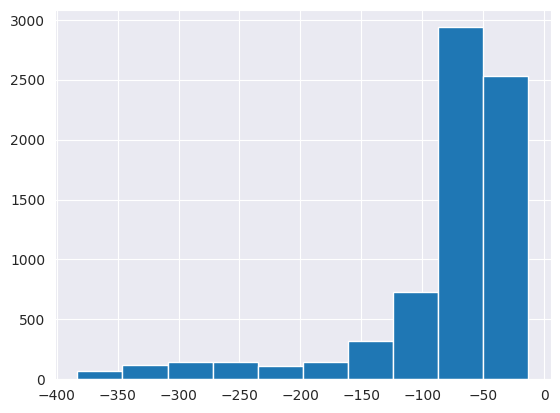

In [106]:
set_df["elevation"].hist()